In [1]:
"""
make energy deposit plot in TOF
@aurthor Jiancheng Zeng
@Nov 20 2021
"""

'\nmake energy deposit plot in TOF\n@aurthor Jiancheng Zeng\n@Nov 20 2021\n'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statistics
import time
from numpy import array
import pandas as pd
import math
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d
import random
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [17]:
"""
Vector title: [0]Event number/[1]energy deposit on the outer TOF/[2]energy deposit on the inner TOF/[3]time in between TOF/[4]angle in between TOF/[5]distance in between TOF/[6]distance travel inside LArTPC/[7]penetration depth on z/[8]distance on the side/[9]initial energy/[10]event type
"""

anti_proton_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_proton_5e7_Ene_0_500_vector.txt", delimiter = ' '))
anti_deuteron_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_deuteron_5e7_Ene_0_600_vector.txt", delimiter = ' '))
anti_He3_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/ORI_Stop_anti_He3_1e9_Ene_0_1500_vector.txt", delimiter = ' '))

print("finish reading data!")

finish reading data!


In [30]:
sigma = 0.16    #energy resolution percentage
deltaT = 0.5    #timing resolution/ns

anti_proton = anti_proton_Old[anti_proton_Old[:, 10] == 1]
anti_He3 = anti_He3_Old[anti_He3_Old[:, 10] == 1]
time_pbar_err = []
dEOut_pbar_err = []
dEIn_pbar_err = []

time_He3bar_err = []
dEOut_He3bar_err = []
dEIn_He3bar_err = []

for i in range(max(len(anti_proton[:, 3]), len(anti_He3[:, 3]))):
    if(i<len(anti_proton[:, 3])):
        dEOut_pbar_err.append(random.gauss(anti_proton[i, 1], sigma * anti_proton[i, 1]))
        dEIn_pbar_err.append(random.gauss(anti_proton[i, 2], sigma * anti_proton[i, 2]))
        time_pbar_err.append(anti_proton[i, 3] + deltaT * 2 * (random.random() - 0.5))
    if(i<len(anti_He3[:, 3])):
        dEOut_He3bar_err.append(random.gauss(anti_He3[i, 1], sigma * anti_He3[i, 1]))
        dEIn_He3bar_err.append(random.gauss(anti_He3[i, 2], sigma * anti_He3[i, 2]))
        time_He3bar_err.append(anti_He3[i, 3] + deltaT * 2 * (random.random() - 0.5))
    print("applying error:"+str(int(100*i/max(len(anti_proton[:, 3]), len(anti_He3[:, 3]))))+"%", end='\r')
    
time_pbar_err = np.array(time_pbar_err)
dEOut_pbar_err = np.array(dEOut_pbar_err)
dEIn_pbar_err = np.array(dEIn_pbar_err)

time_He3bar_err = np.array(time_He3bar_err)
dEOut_He3bar_err = np.array(dEOut_He3bar_err)
dEIn_He3bar_err = np.array(dEIn_He3bar_err)
print("Finished processing!")

Finished processing!


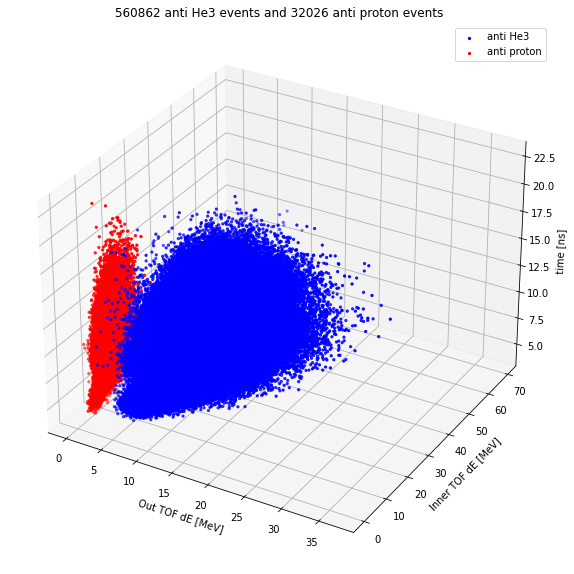

In [31]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.scatter3D(dEOut_He3bar_err, dEIn_He3bar_err, time_He3bar_err, marker = '.', color = 'b', label = 'anti He3')
ax.scatter3D(dEOut_pbar_err, dEIn_pbar_err, time_pbar_err, marker = '.', color = 'r', label = 'anti proton')

ax.set_xlabel("Out TOF dE [MeV]")
ax.set_ylabel('Inner TOF dE [MeV]')
ax.set_zlabel('time [ns]')
plt.legend()
plt.title("%d anti He3 events and %d anti proton events"%(len(anti_He3[:, 2]), len(anti_proton[:, 2])))
plt.savefig("./TOF3D.jpg")
plt.show()


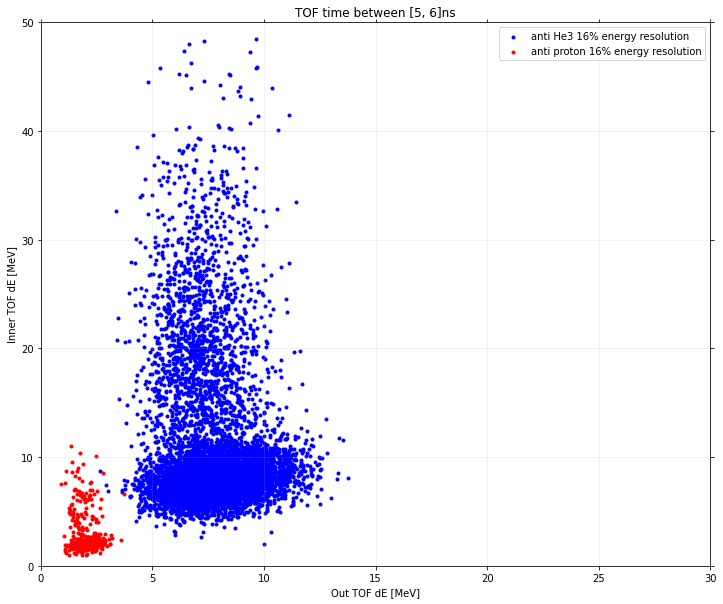

7840


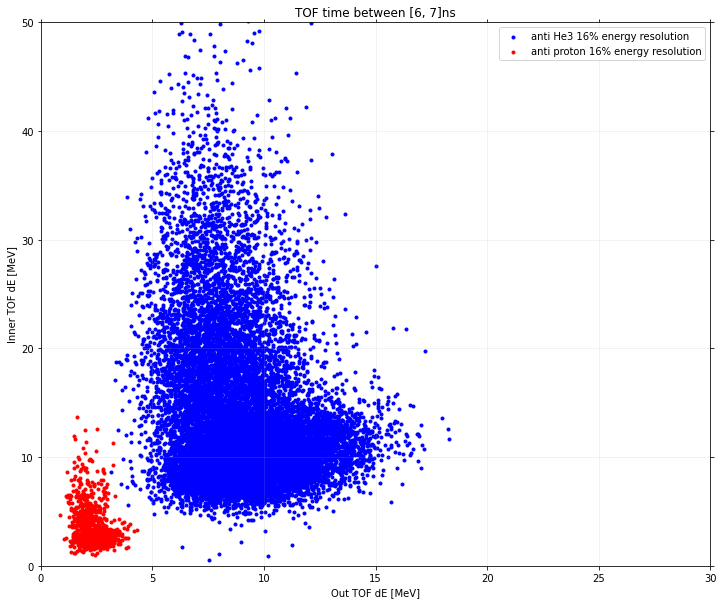

18818


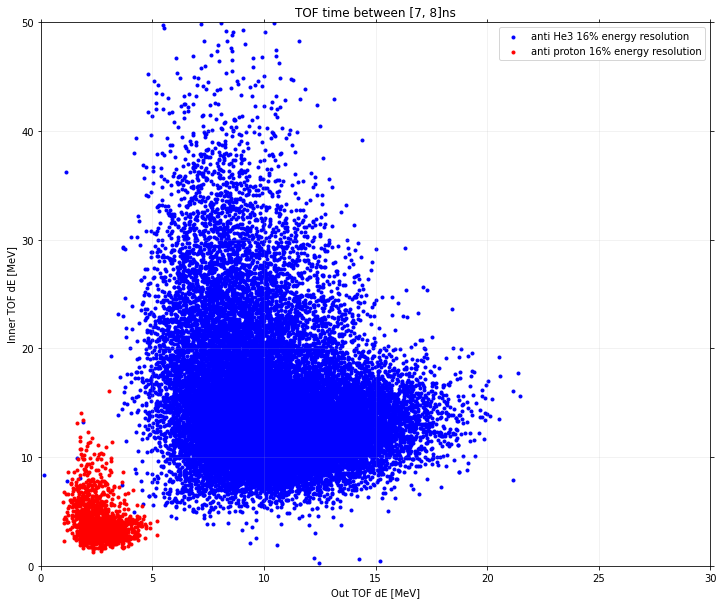

28025


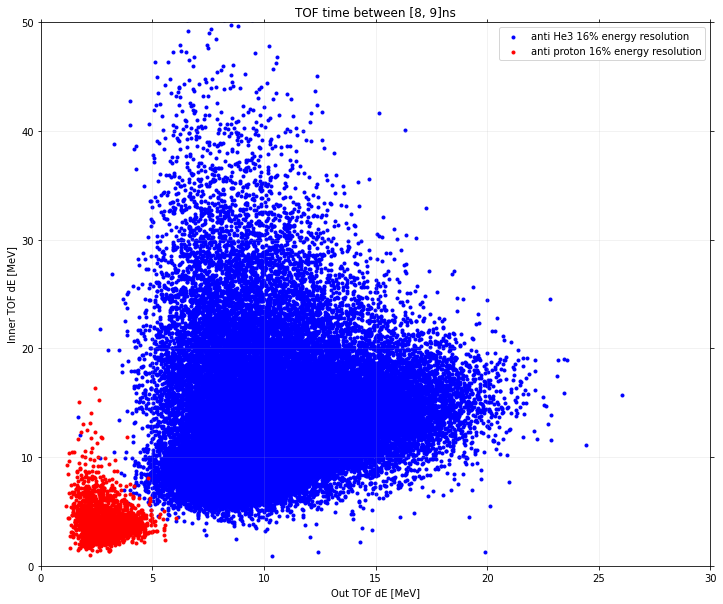

49716


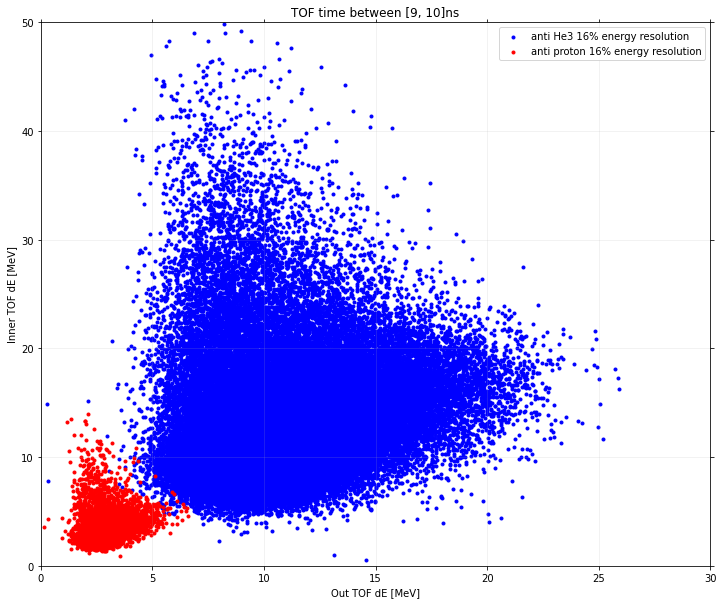

89440


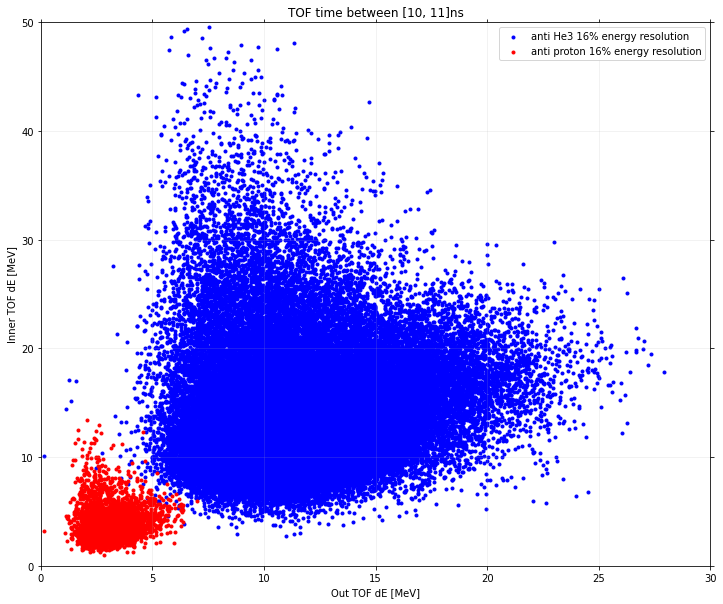

104587


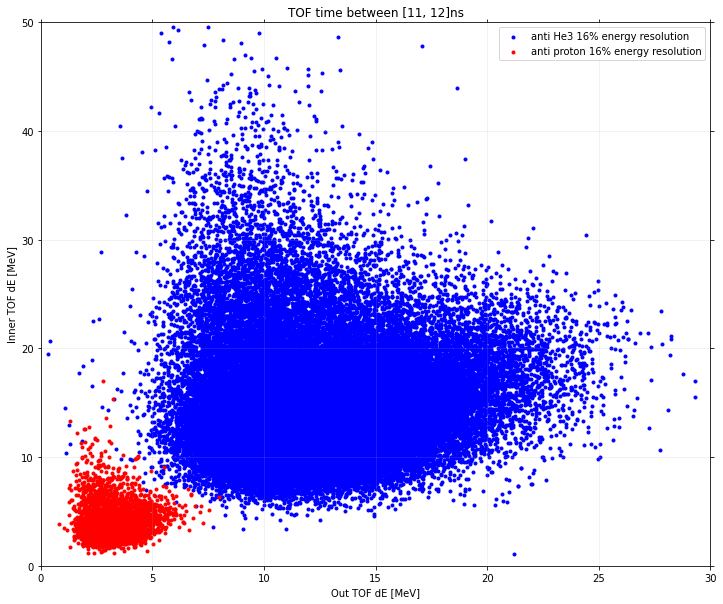

97065


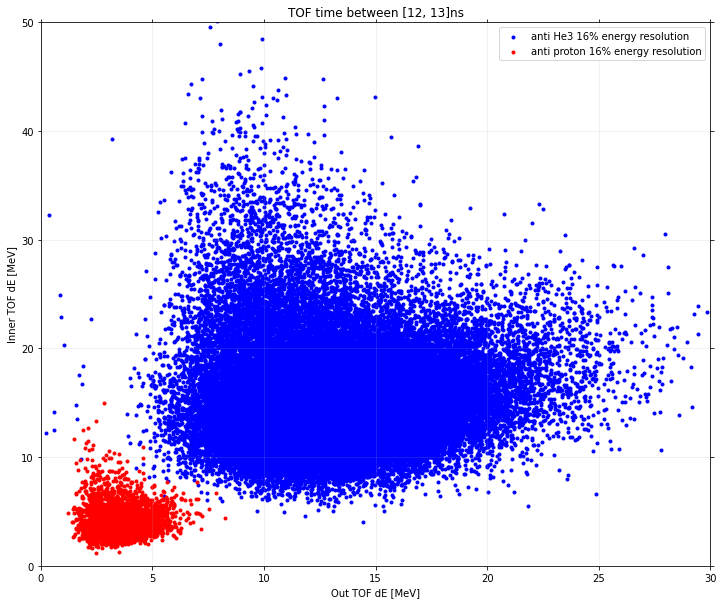

70650


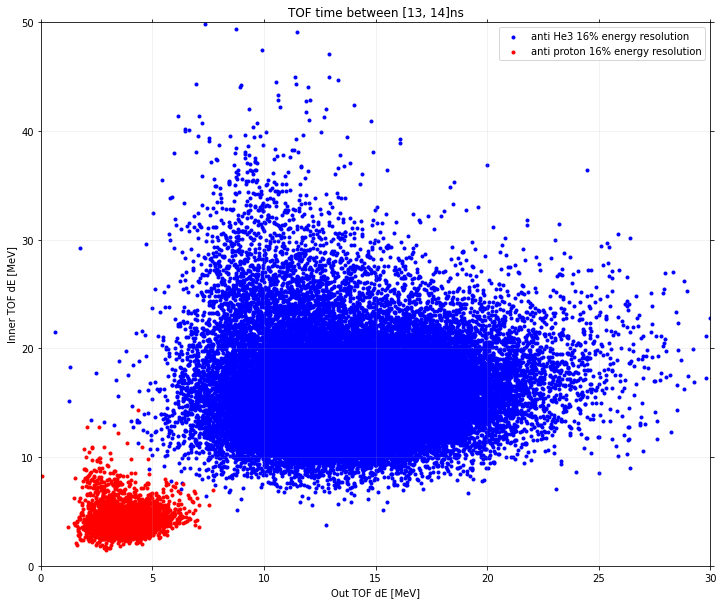

44162


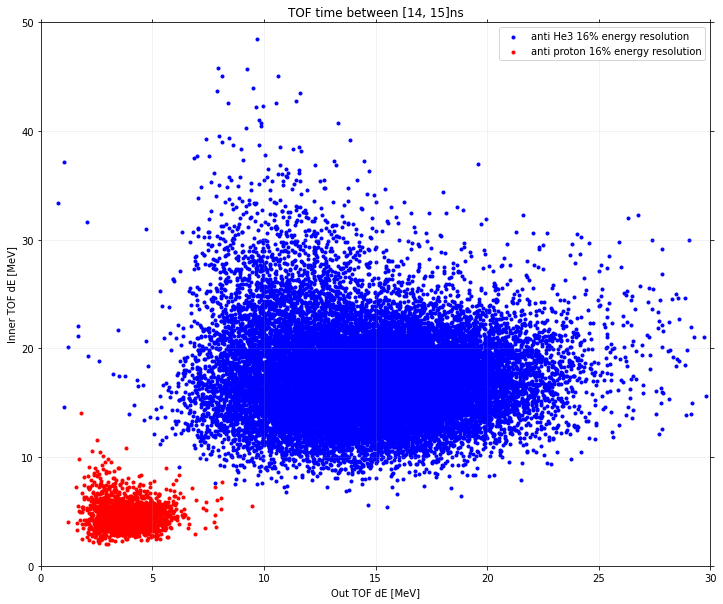

25379


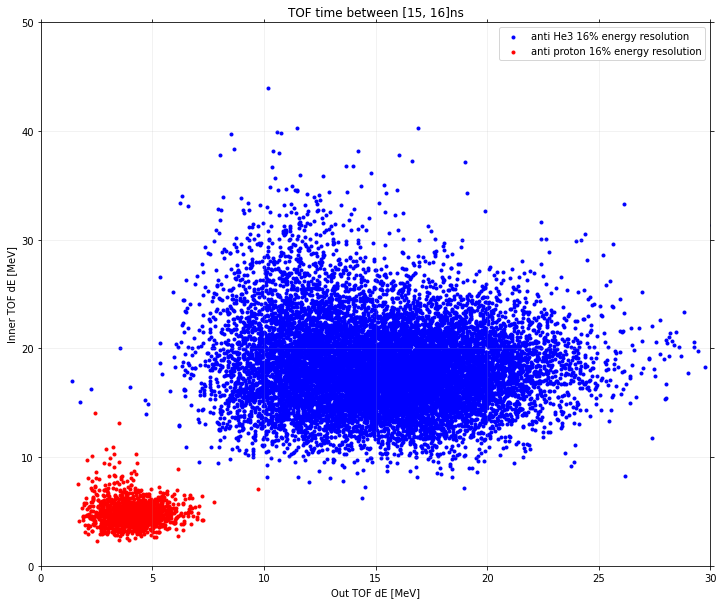

13620


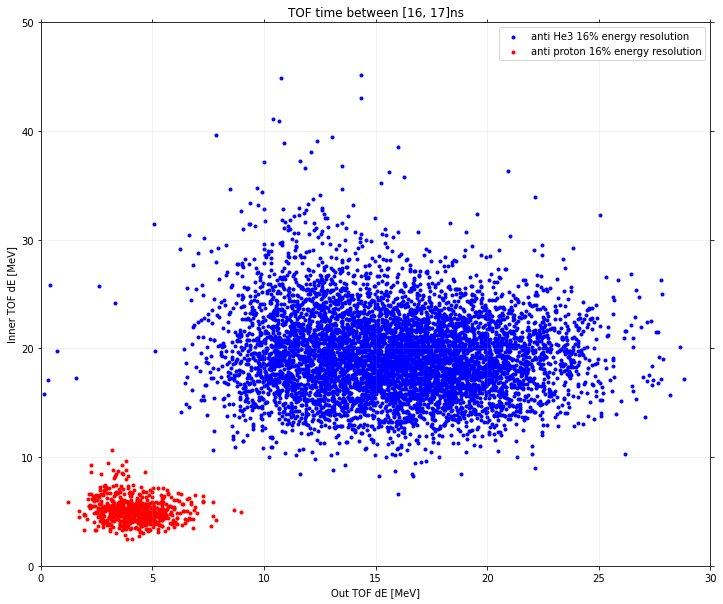

6613


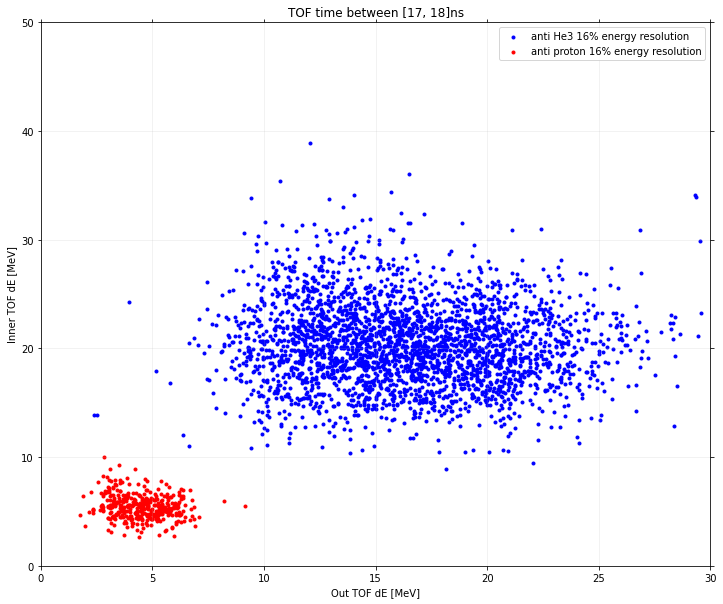

2859


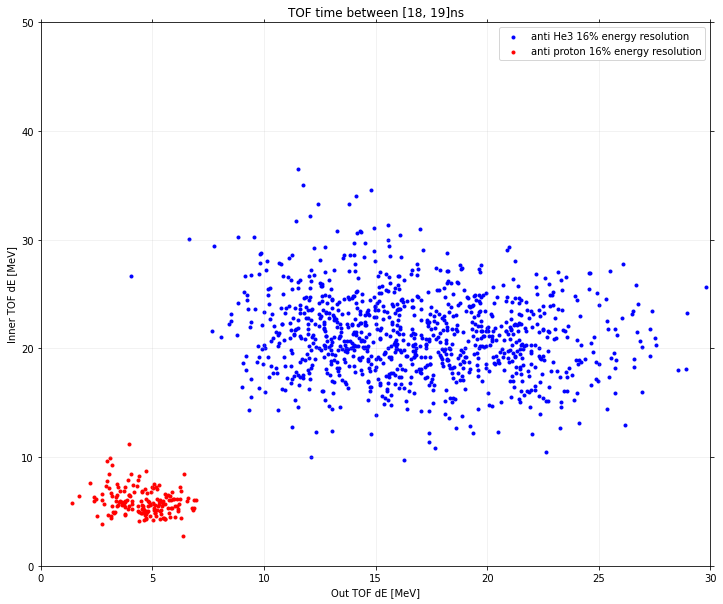

1007


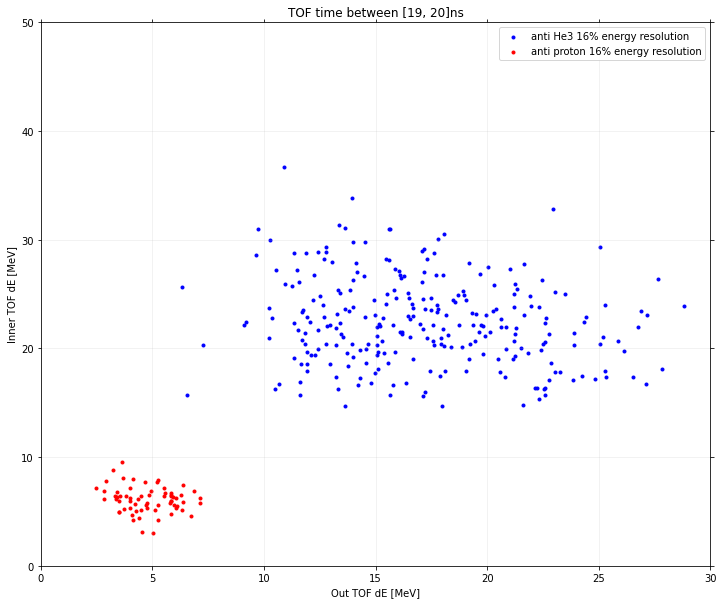

270


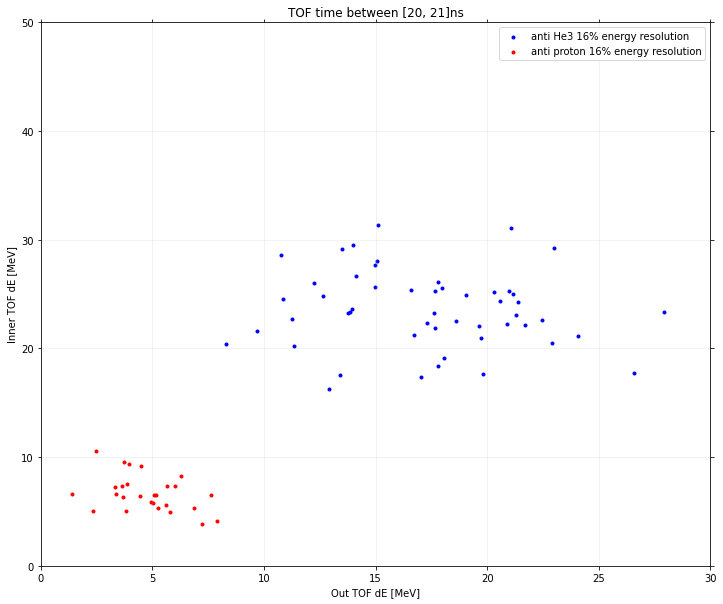

51


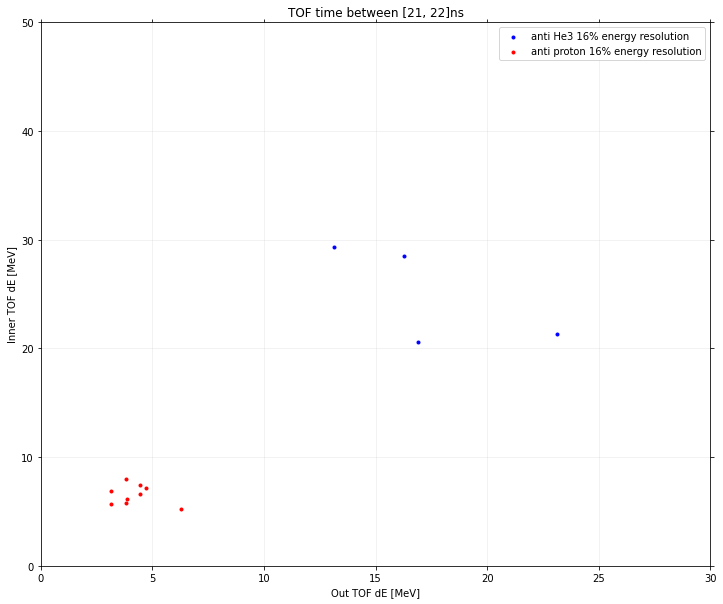

4


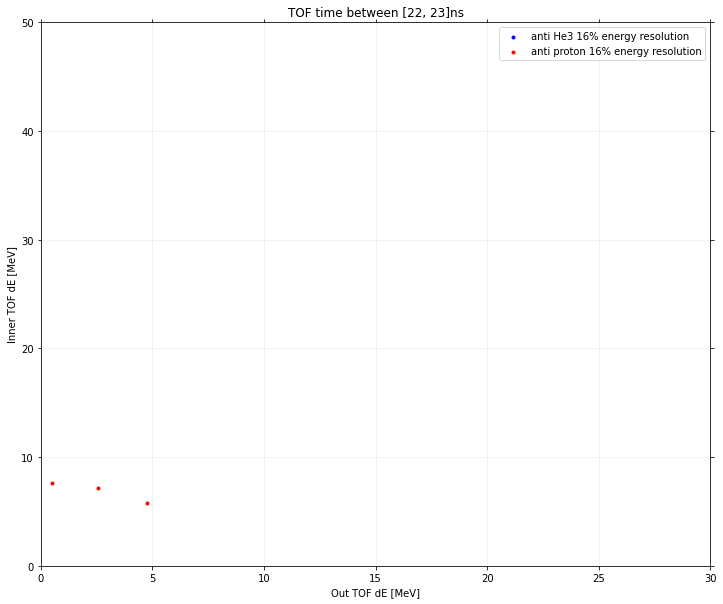

0


In [32]:
start_time = 5
#matplotlib.rcParams.update({'font.size': 30})
for n in range(18):
    fig = plt.figure(figsize=(12,10))
    plt.cla()
    plt.scatter(dEOut_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)], dEIn_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)], label = "anti He3 %d%% energy resolution"%(100*sigma), marker = '.', color = 'b')
    plt.scatter(dEOut_pbar_err[np.logical_and(time_pbar_err > start_time+n, time_pbar_err < start_time + 1 +n)] , dEIn_pbar_err[np.logical_and(time_pbar_err >start_time+n, time_pbar_err <start_time + 1 +n)], label = "anti proton %d%% energy resolution"%(100*sigma), marker = '.', color = 'r')
    #plt.scatter(dEOut_dbar_err[np.logical_and(time_dbar_err>start_time+n, time_dbar_err<start_time + 1 +n)], dEIn_dbar_err[np.logical_and(time_dbar_err>start_time+n, time_dbar_err<start_time + 1 +n)], label = "anti deuteron 45 degree", marker = '.', color = 'lightcoral')
    plt.grid(alpha = 0.2)
    plt.legend()
    plt.title("TOF time between [{}".format(start_time+n)+", {}".format(start_time + 1 +n)+"]ns")
    plt.xlabel('Out TOF dE [MeV]')
    plt.ylabel('Inner TOF dE [MeV]')
    plt.xlim([0, 30])
    plt.ylim([0, 50])
    plt.show()
    print(len(dEOut_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)]))
    time.sleep(1)

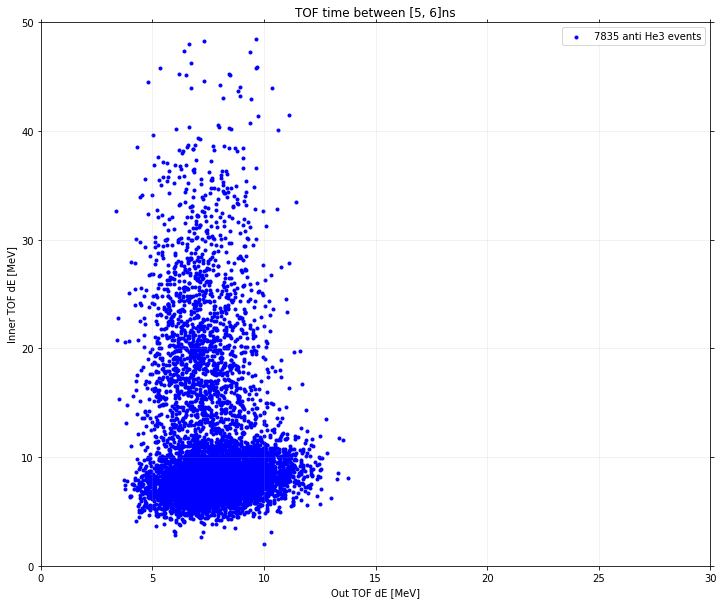

Outer TOF cut:3.714477809976244
Inner TOF cut:11.010435145171662
antiproton number:394
antiHe3 number:7840
cut efficiency:0.9992347914806785


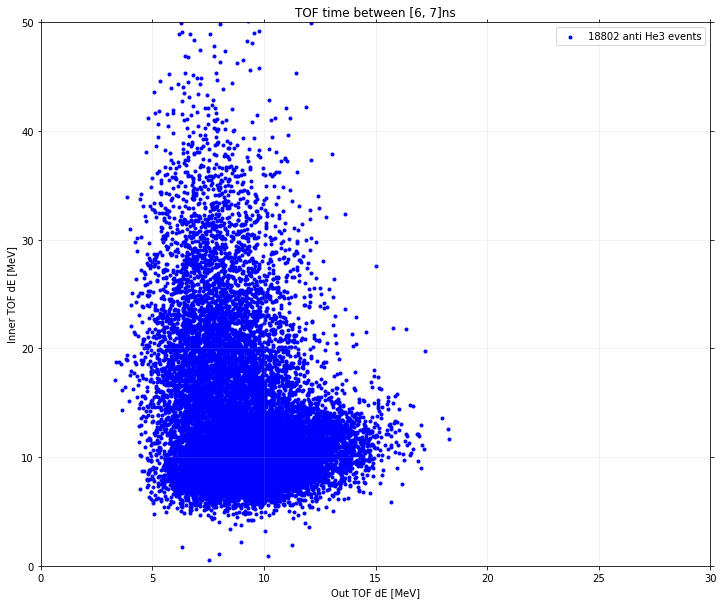

Outer TOF cut:4.328656272528543
Inner TOF cut:13.707561604644876
antiproton number:928
antiHe3 number:18818
cut efficiency:0.999096657633243


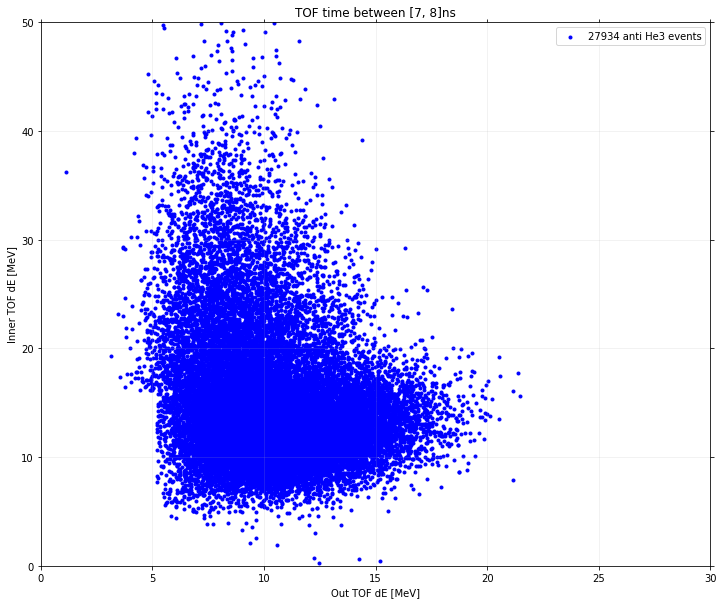

Outer TOF cut:5.200092505514214
Inner TOF cut:16.03376972348704
antiproton number:1549
antiHe3 number:28025
cut efficiency:0.9967173339042318


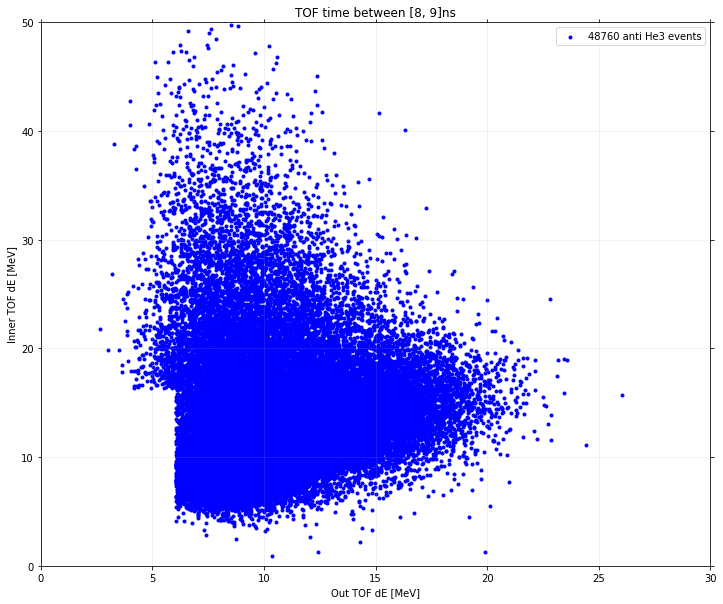

Outer TOF cut:6.041392465681538
Inner TOF cut:16.36559776454148
antiproton number:1876
antiHe3 number:49716
cut efficiency:0.9807510509483678


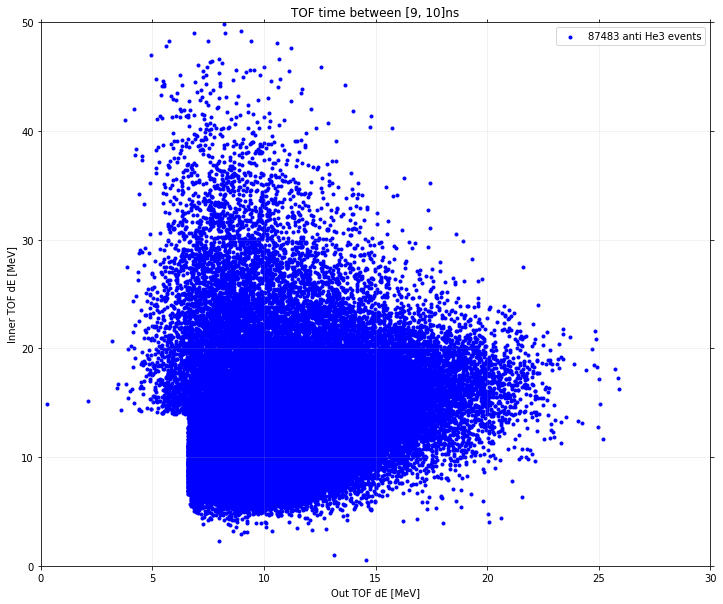

Outer TOF cut:6.571592473225451
Inner TOF cut:13.989752102613428
antiproton number:3738
antiHe3 number:89440
cut efficiency:0.9781084737424671


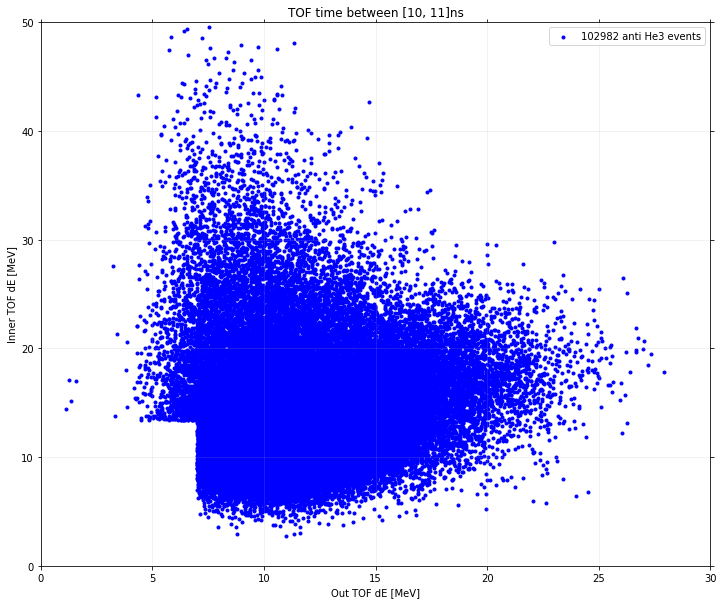

Outer TOF cut:7.003916467849164
Inner TOF cut:13.395858622936803
antiproton number:5208
antiHe3 number:104587
cut efficiency:0.9846445098864114


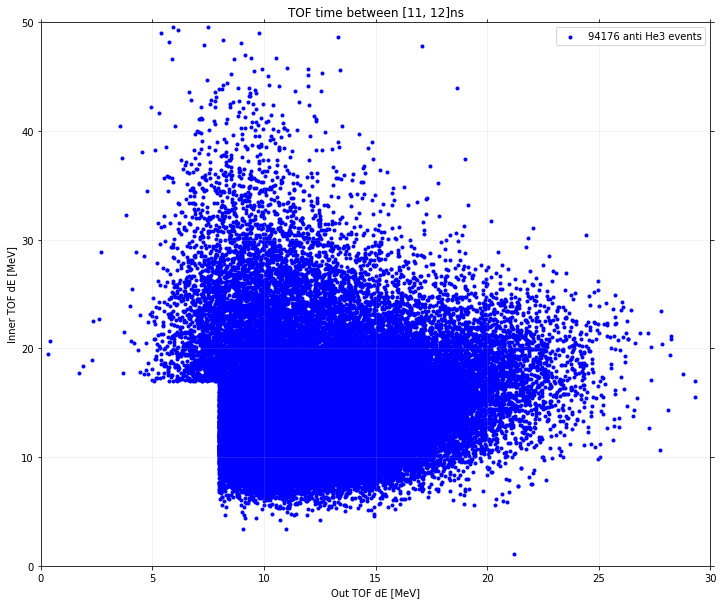

Outer TOF cut:7.96336214577709
Inner TOF cut:16.96649746438823
antiproton number:5396
antiHe3 number:97065
cut efficiency:0.9702264438629387


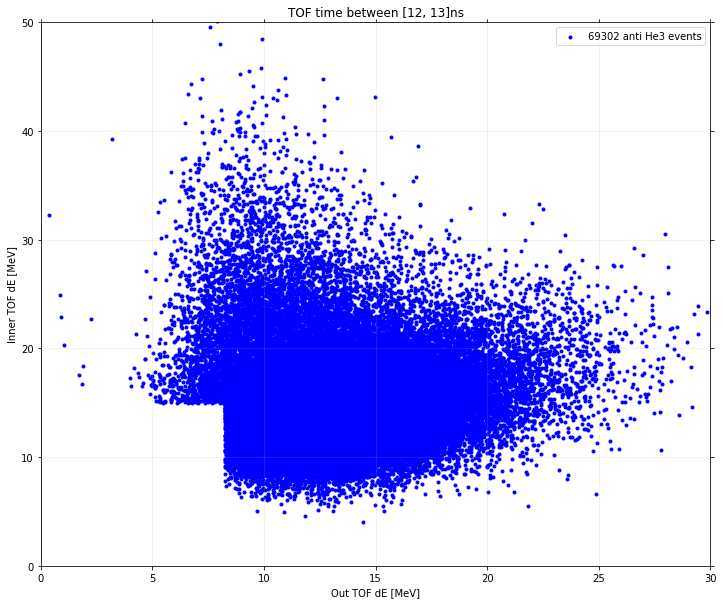

Outer TOF cut:8.238779683678665
Inner TOF cut:14.968055164865234
antiproton number:4741
antiHe3 number:70650
cut efficiency:0.9809061442867051


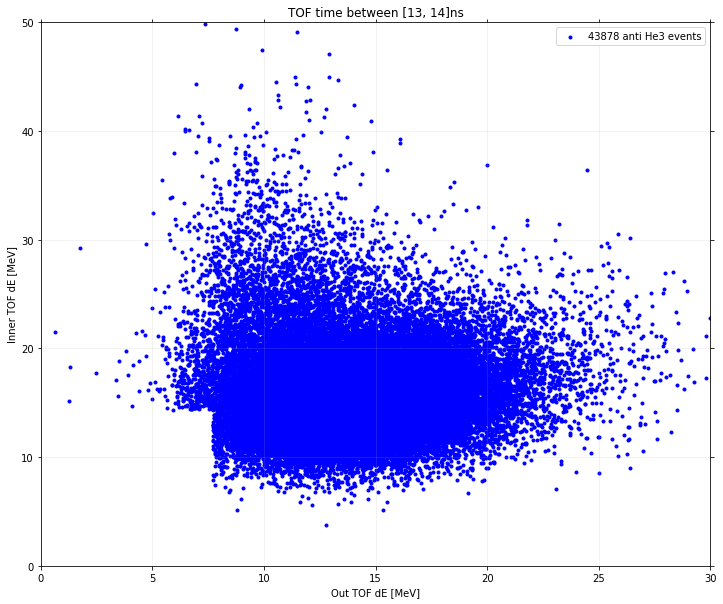

Outer TOF cut:7.699787436476909
Inner TOF cut:14.361084763420592
antiproton number:3476
antiHe3 number:44162
cut efficiency:0.9935466340601862


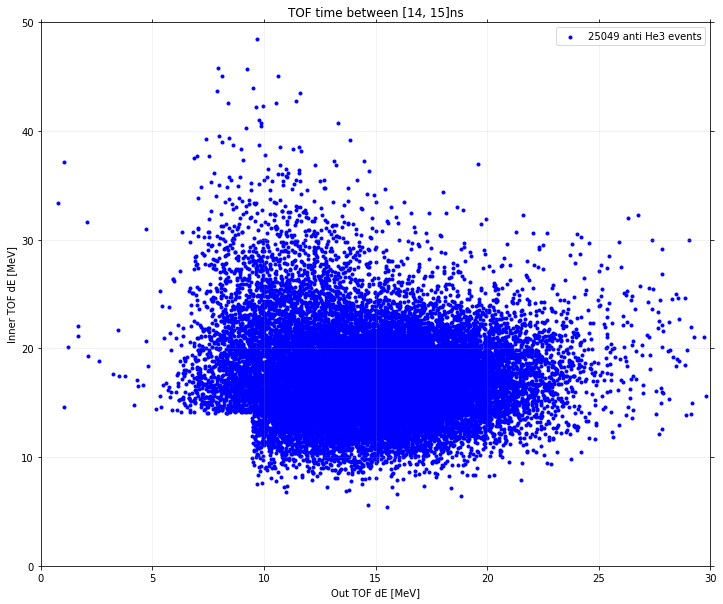

Outer TOF cut:9.454422794548616
Inner TOF cut:14.02546246015783
antiproton number:2096
antiHe3 number:25379
cut efficiency:0.9869582348305752


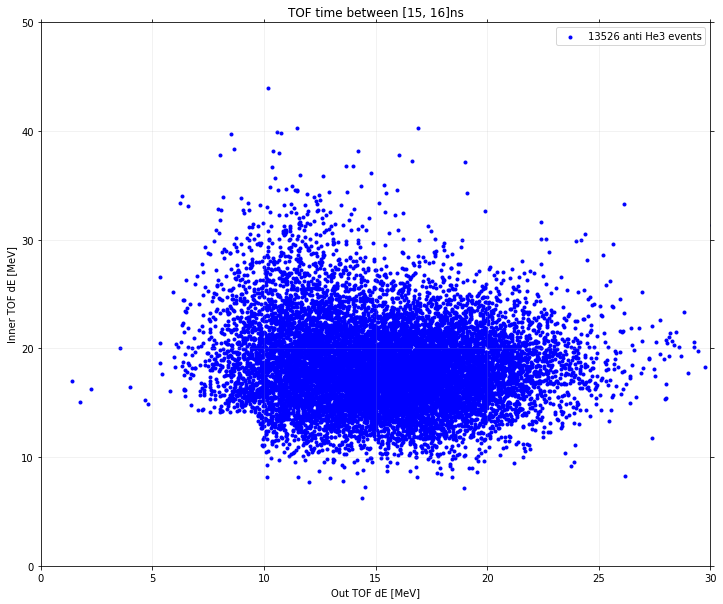

Outer TOF cut:9.716244261833817
Inner TOF cut:14.054450113183268
antiproton number:1296
antiHe3 number:13620
cut efficiency:0.9930254753689156


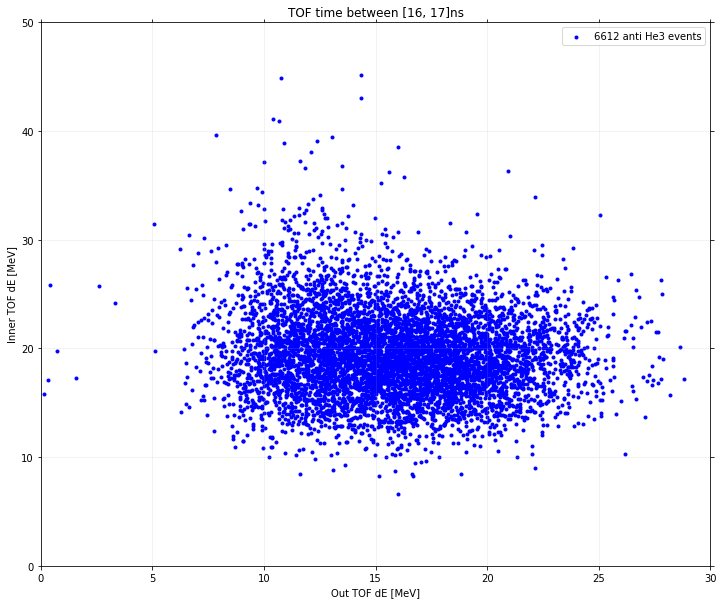

Outer TOF cut:8.984018181467183
Inner TOF cut:10.620612666312594
antiproton number:642
antiHe3 number:6613
cut efficiency:0.9996976111279104


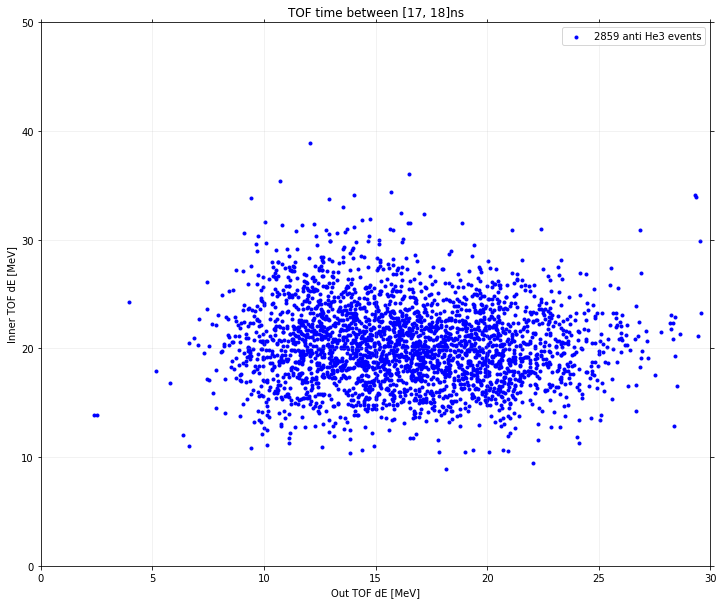

Outer TOF cut:9.127562351215243
Inner TOF cut:10.033491844416162
antiproton number:375
antiHe3 number:2859
cut efficiency:0.9996503496503496


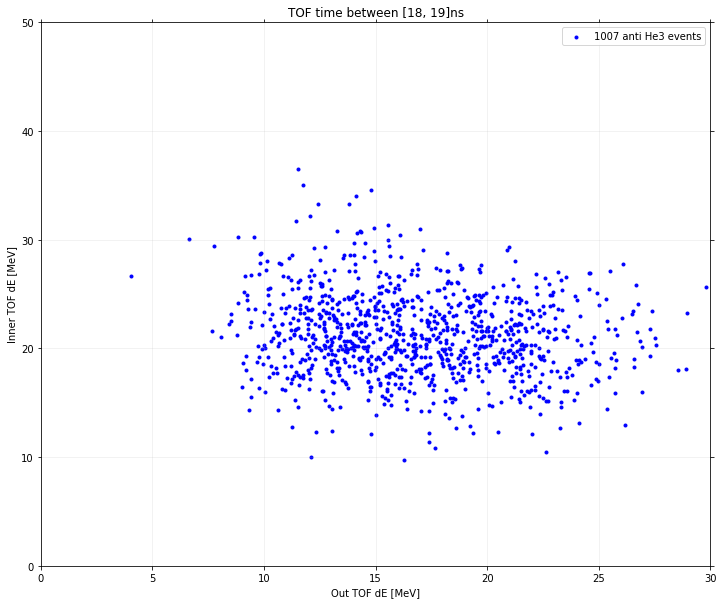

Outer TOF cut:6.938918840744062
Inner TOF cut:11.20793649123424
antiproton number:168
antiHe3 number:1007
cut efficiency:0.9990079365079365


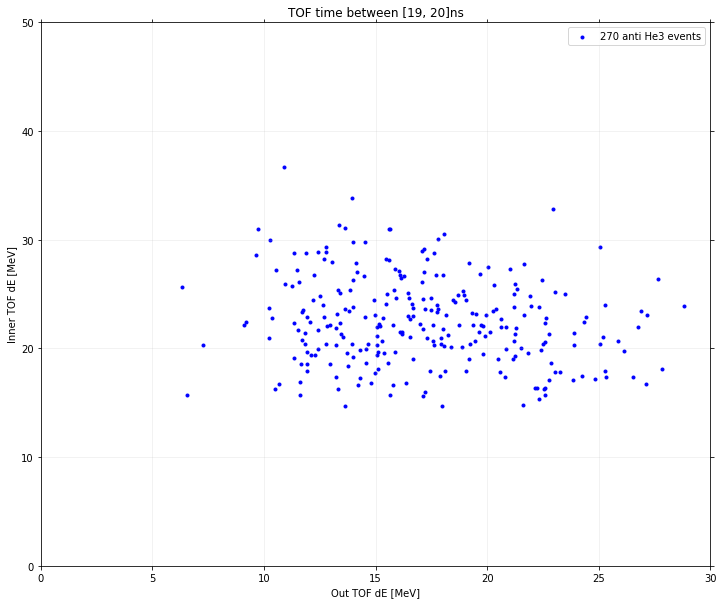

Outer TOF cut:7.13865101521899
Inner TOF cut:9.520563409061399
antiproton number:66
antiHe3 number:270
cut efficiency:0.996309963099631


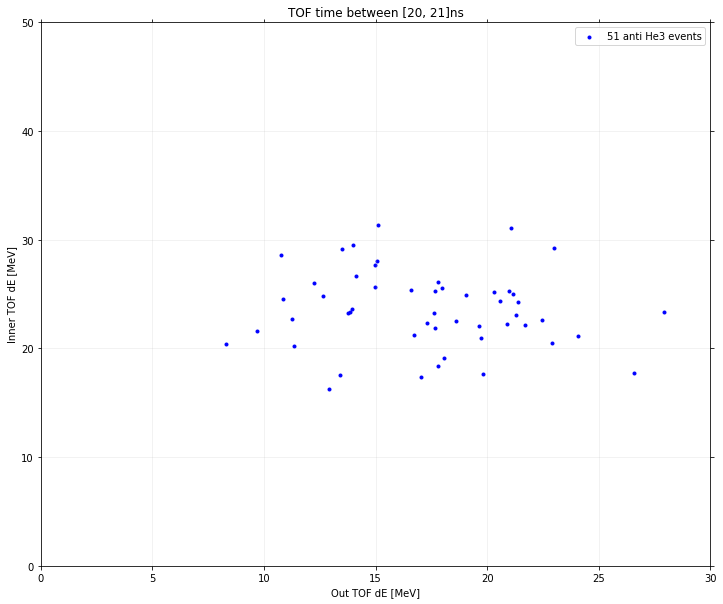

Outer TOF cut:7.8766181352680125
Inner TOF cut:10.59782412238903
antiproton number:27
antiHe3 number:51
cut efficiency:0.9807692307692307


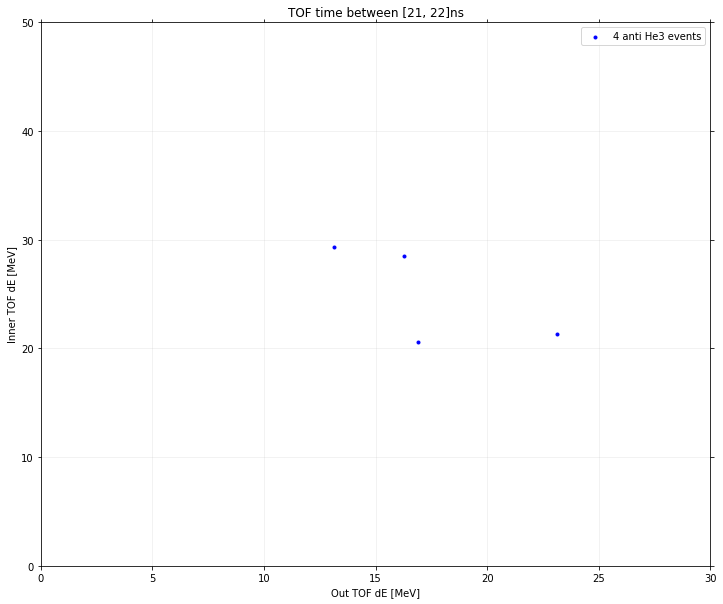

Outer TOF cut:6.288379692085836
Inner TOF cut:7.998167524744859
antiproton number:9
antiHe3 number:4
cut efficiency:0.8


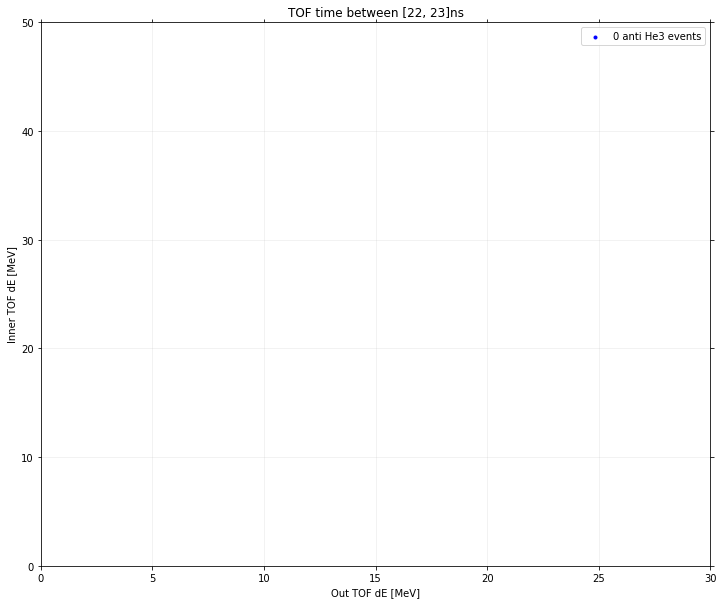

Outer TOF cut:4.741683338946394
Inner TOF cut:7.595819885623596
antiproton number:3
antiHe3 number:0
cut efficiency:0.0
Finished!
 550530 anti He3 events been kept
Average cut efficiency = 98%


In [33]:
start_time = 5
low_limit = 10
high_limit = 11
events_kept = 0

#matplotlib.rcParams.update({'font.size': 30})
for n in range(18):
    fig = plt.figure(figsize=(12,10))
    N_x = []
    N_y = []
    He3bar_cut_x = []
    He3bar_cut_y = []
    plt.cla()
    cut_min_x = np.max(dEOut_pbar_err[np.logical_and(time_pbar_err>start_time+n, time_pbar_err<start_time+n+1)]) 
    cut_min_y = np.max(dEIn_pbar_err[np.logical_and(time_pbar_err>start_time+n, time_pbar_err<start_time+n+1)])
    He3bar_cut_x = dEOut_He3bar_err[np.logical_and(time_He3bar_err>start_time+n, time_He3bar_err<start_time+n+1)]
    He3bar_cut_y = dEIn_He3bar_err[np.logical_and(time_He3bar_err>start_time+n, time_He3bar_err<start_time+n+1)]
    N_x = He3bar_cut_x[np.logical_not(np.logical_and(He3bar_cut_x<cut_min_x, He3bar_cut_y<cut_min_y))]
    N_y = He3bar_cut_y[np.logical_not(np.logical_and(He3bar_cut_x<cut_min_x, He3bar_cut_y<cut_min_y))]
    plt.scatter(N_x, N_y, marker = '.', color = 'b', label = '%d anti He3 events'%len(N_y))
    plt.grid(alpha = 0.2)
    plt.xlabel('Out TOF dE [MeV]')
    plt.ylabel('Inner TOF dE [MeV]')
    plt.title("TOF time between [{}".format(start_time+n)+", {}".format(start_time + 1 +n)+"]ns")
    plt.legend()
    plt.xlim([0, 30])
    plt.ylim([0, 50])
    plt.show()
    events_kept = events_kept + len(N_y)
    print("Outer TOF cut:"+str(cut_min_x))
    print("Inner TOF cut:"+str(cut_min_y))
    print("antiproton number:"+str(len(dEOut_pbar_err[np.logical_and(time_pbar_err >start_time+n, time_pbar_err <start_time + 1 +n)])))
    print("antiHe3 number:"+str(len(dEOut_He3bar_err[np.logical_and(time_He3bar_err >start_time+n, time_He3bar_err <start_time + 1 +n)])))
    print("cut efficiency:"+str(len(N_x)/(len(He3bar_cut_x)+1)))
    
print("Finished!\n %d anti He3 events been kept"%events_kept)
print("Average cut efficiency = %d%%"%(100*events_kept/len(anti_He3[:, 2])))

In [24]:
print(len(anti_He3_Old[anti_He3_Old[:, 10]==1]))
print(len(anti_He3_Old[anti_He3_Old[:, 10]==0]))
print(len(anti_proton_Old[anti_proton_Old[:, 10]==1]))
print(len(anti_proton_Old[anti_proton_Old[:, 10]==0]))

560862
910518
32026
48725


0.0407


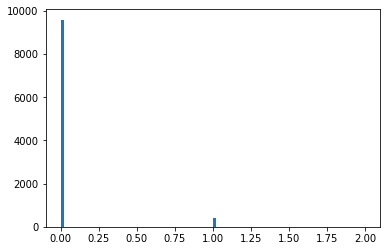

In [25]:
s = np.random.poisson(3.96E-02, 10000)
plt.hist(s, bins = 100, range=[0, 2])
print(len(s[s>=1])/10000)